<a href="https://colab.research.google.com/github/SharveshRamchandani/StockPricePrediction/blob/main/Stock_Market_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Importing the Data for training


In [ ]:
df =pd.read_csv('/content/ADANIPORTS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
# viewing the dimensions of df
df.shape

(3322, 15)

# 2.2. Understanding the data


In [ ]:
#

3.1 Data Statistics


In [ ]:
# View Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [ ]:
# view descriptive statistics
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [ ]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
# Checking the null values
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

Text(0, 0.5, 'Count')

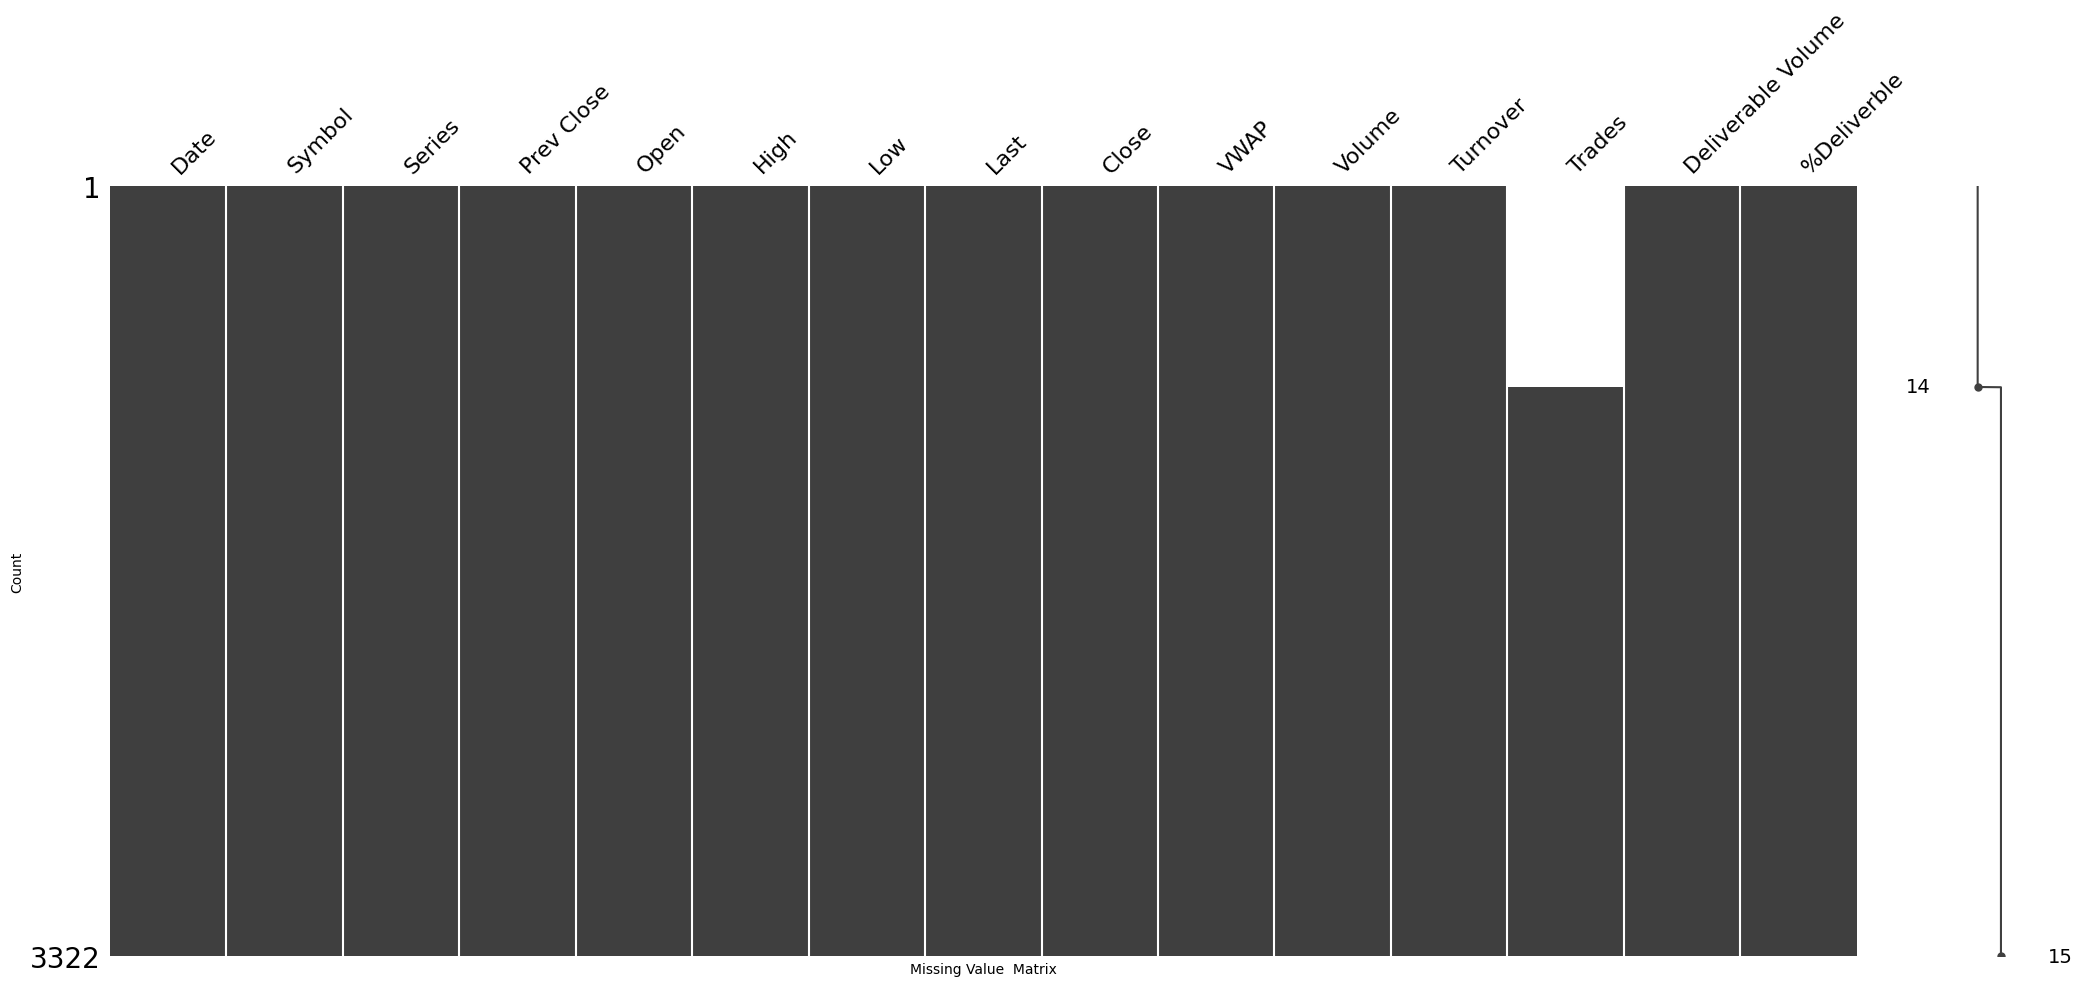

In [ ]:
#visualinsing Missing Data
import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Value  Matrix")
plt.ylabel("Count")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

3.2 Lets take any one year's data from the datasets and name it as stockprice_one_year.Use this newly created Dataframe for the future analysis
*italicized text*

In [ ]:
stockprice_one_year = df[(df['Date']>'2011-03-31')& (df['Date']<'2012-04-01')]
stockprice_one_year

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
826,2011-04-01,MUNDRAPORT,EQ,136.65,138.00,142.25,137.50,141.00,141.15,140.36,1716486,2.409280e+13,NaN,965478,0.5625
827,2011-04-04,MUNDRAPORT,EQ,141.15,142.35,149.10,141.50,148.95,148.20,146.00,1125553,1.643326e+13,NaN,501391,0.4455
828,2011-04-05,MUNDRAPORT,EQ,148.20,148.50,158.00,148.05,157.00,156.85,154.12,1712167,2.638708e+13,NaN,475131,0.2775
829,2011-04-06,MUNDRAPORT,EQ,156.85,158.00,158.40,152.25,154.15,153.65,155.05,934007,1.448215e+13,NaN,424174,0.4541
830,2011-04-07,MUNDRAPORT,EQ,153.65,154.75,157.00,152.70,155.75,155.75,154.85,1042870,1.614923e+13,NaN,663880,0.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,2012-03-26,ADANIPORTS,EQ,123.45,123.00,123.70,119.05,119.75,120.55,121.00,1124699,1.360846e+13,14021.0,602271,0.5355
1071,2012-03-27,ADANIPORTS,EQ,120.55,121.55,123.00,118.25,121.65,121.50,120.66,1098462,1.325451e+13,14310.0,487096,0.4434
1072,2012-03-28,ADANIPORTS,EQ,121.50,121.50,121.50,117.00,118.55,118.25,118.44,1756343,2.080279e+13,26906.0,1083219,0.6167
1073,2012-03-29,ADANIPORTS,EQ,118.25,118.00,125.50,116.10,124.15,124.20,120.57,2869127,3.459164e+13,29996.0,1933482,0.6739


In [ ]:
stockprice_one_year.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [ ]:
stockprice_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 826 to 1074
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                249 non-null    object 
 1   Symbol              249 non-null    object 
 2   Series              249 non-null    object 
 3   Prev Close          249 non-null    float64
 4   Open                249 non-null    float64
 5   High                249 non-null    float64
 6   Low                 249 non-null    float64
 7   Last                249 non-null    float64
 8   Close               249 non-null    float64
 9   VWAP                249 non-null    float64
 10  Volume              249 non-null    int64  
 11  Turnover            249 non-null    float64
 12  Trades              209 non-null    float64
 13  Deliverable Volume  249 non-null    int64  
 14  %Deliverble         249 non-null    float64
dtypes: float64(10), int64(2), object(3)
memory usage: 31.1

4.Data Vizualization


4.1 Let's compare stockprice_one_year["feature_name"].plot()vs df["Feature_name"].plot()

<Axes: >

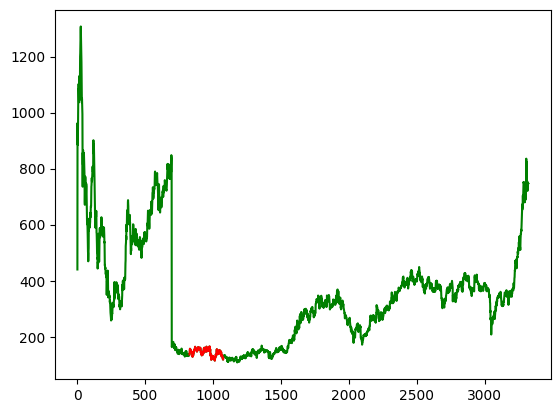

In [ ]:
pl = df["Prev Close"].plot(c='green')
stockprice_one_year['Prev Close'].plot(ax=pl,c='red')

Observation:

For the economicyear 2011-2012 Prev Close of Adani port's  range isinbetween 100 - 200,whereas latter years it increases a lot.From which we can conclude that  company has faced positive impact in stock market

<Axes: >

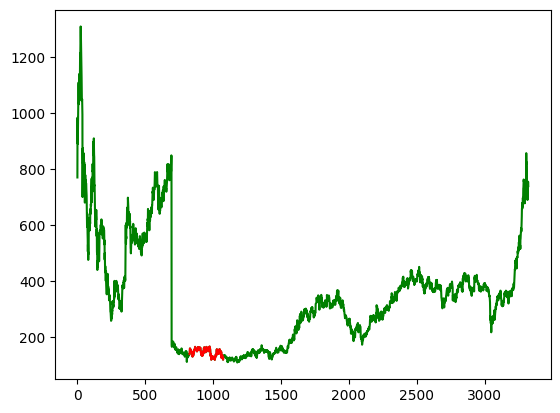

In [ ]:
pl = df['Open'].plot(c='green')
stockprice_one_year['Open'].plot(ax=pl,c='red')

<Axes: >

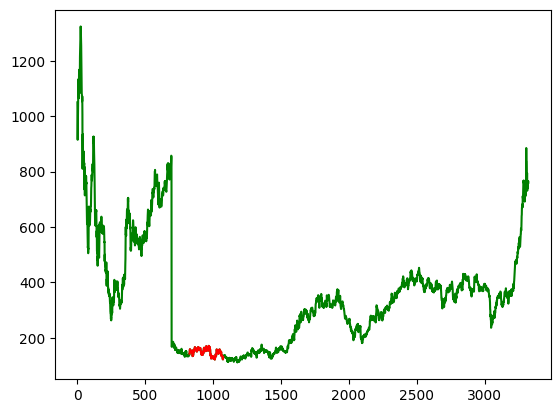

In [ ]:
pl = df['High'].plot(c='green')
stockprice_one_year['High'].plot(ax=pl,c='red')

<Axes: >

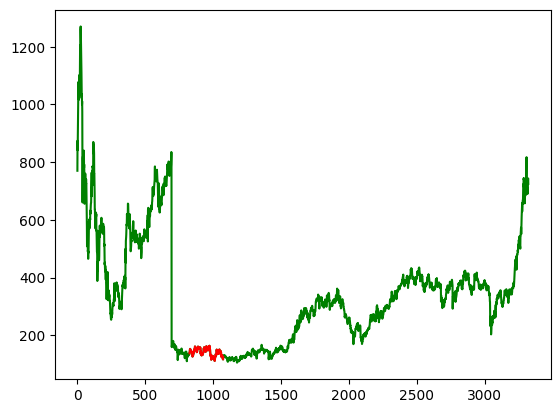

In [ ]:
pl = df['Low'].plot(c='green')
stockprice_one_year['Low'].plot(ax=pl,c='red')

<Axes: >

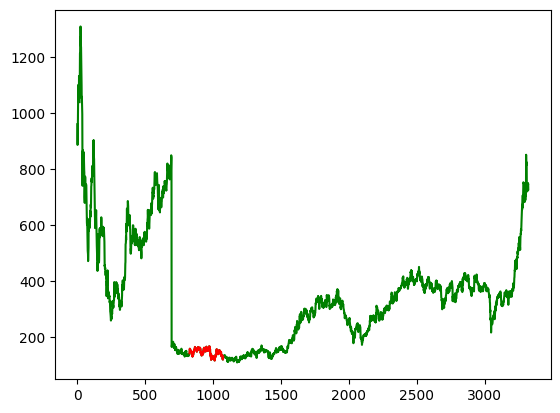

In [ ]:
pl = df['Last'].plot(c='green')
stockprice_one_year['Last'].plot(ax=pl,c='red')

<Axes: >

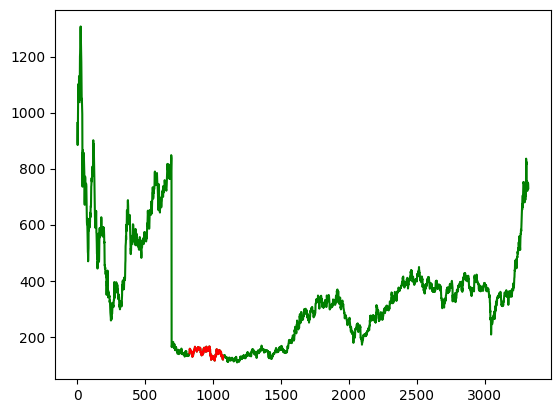

In [ ]:
pl = df['Close'].plot(c='green')
stockprice_one_year['Close'].plot(ax=pl,c='red')

<Axes: >

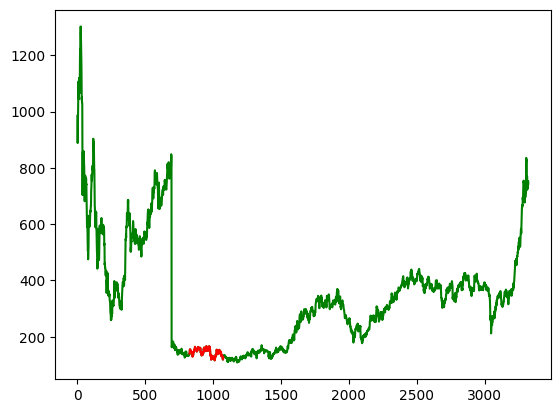

In [ ]:
pl = df['VWAP'].plot(c='green')
stockprice_one_year['VWAP'].plot(ax=pl,c='red')

4.2 Now,let's check whether matplotlib'splotting is better in looks Once the plotting is done,check what  is the  impact in Plots,if you execute thhe line of code: plt.style.use("fivethirtyeight")

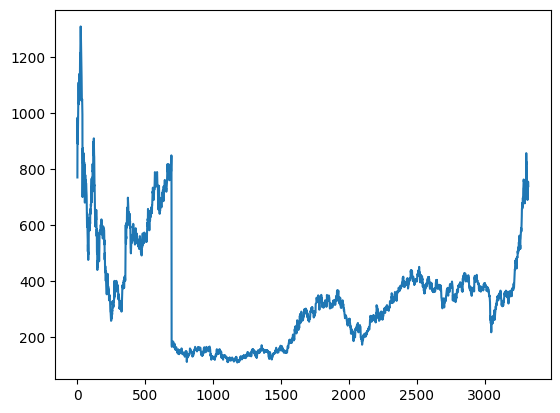

In [ ]:
plt.plot(df['Open'])

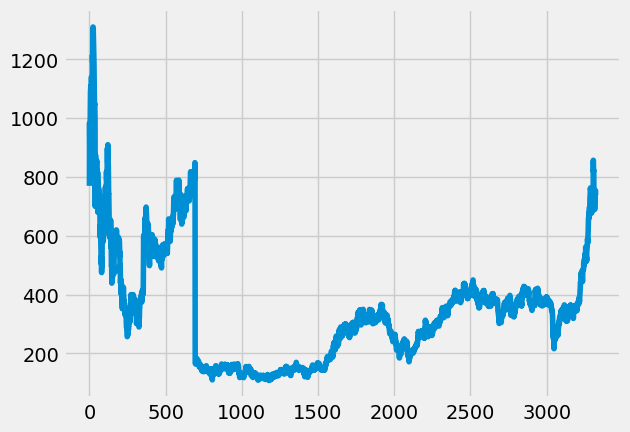

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

Observation:
plt.style.use('fivethirtyeight") gives  us more clarity  in visualization

4.3 Let's find the correlation between t he features. Make a correlation Heatmap.Write  your observations for the same

In [ ]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.997228,0.995592,0.996221,0.995130,0.995193,0.995842,0.055715,0.218236,0.564067,-0.139582,-0.248207
Open,0.997228,1.000000,0.998697,0.998741,0.997855,0.997934,0.998748,0.060509,0.225149,0.566414,-0.135827,-0.249195
High,0.995592,0.998697,1.000000,0.997991,0.999045,0.999058,0.999504,0.068102,0.233603,0.581243,-0.131160,-0.254316
Low,0.996221,0.998741,0.997991,1.000000,0.998788,0.998904,0.999184,0.058525,0.223279,0.555585,-0.136498,-0.249176
Last,0.995130,0.997855,0.999045,0.998788,1.000000,0.999961,0.999605,0.066266,0.231077,0.569473,-0.131522,-0.253037
Close,0.995193,0.997934,0.999058,0.998904,0.999961,1.000000,0.999682,0.066464,0.231263,0.569296,-0.131466,-0.253569
VWAP,0.995842,0.998748,0.999504,0.999184,0.999605,0.999682,1.000000,0.064443,0.229894,0.569272,-0.133324,-0.253705
Volume,0.055715,0.060509,0.068102,0.058525,0.066266,0.066464,0.064443,1.000000,0.907914,0.936381,0.702409,-0.166870
Turnover,0.218236,0.225149,0.233603,0.223279,0.231077,0.231263,0.229894,0.907914,1.000000,0.940225,0.428972,-0.229984
Trades,0.564067,0.566414,0.581243,0.555585,0.569473,0.569296,0.569272,0.936381,0.940225,1.000000,0.478165,-0.288974


<Axes: >

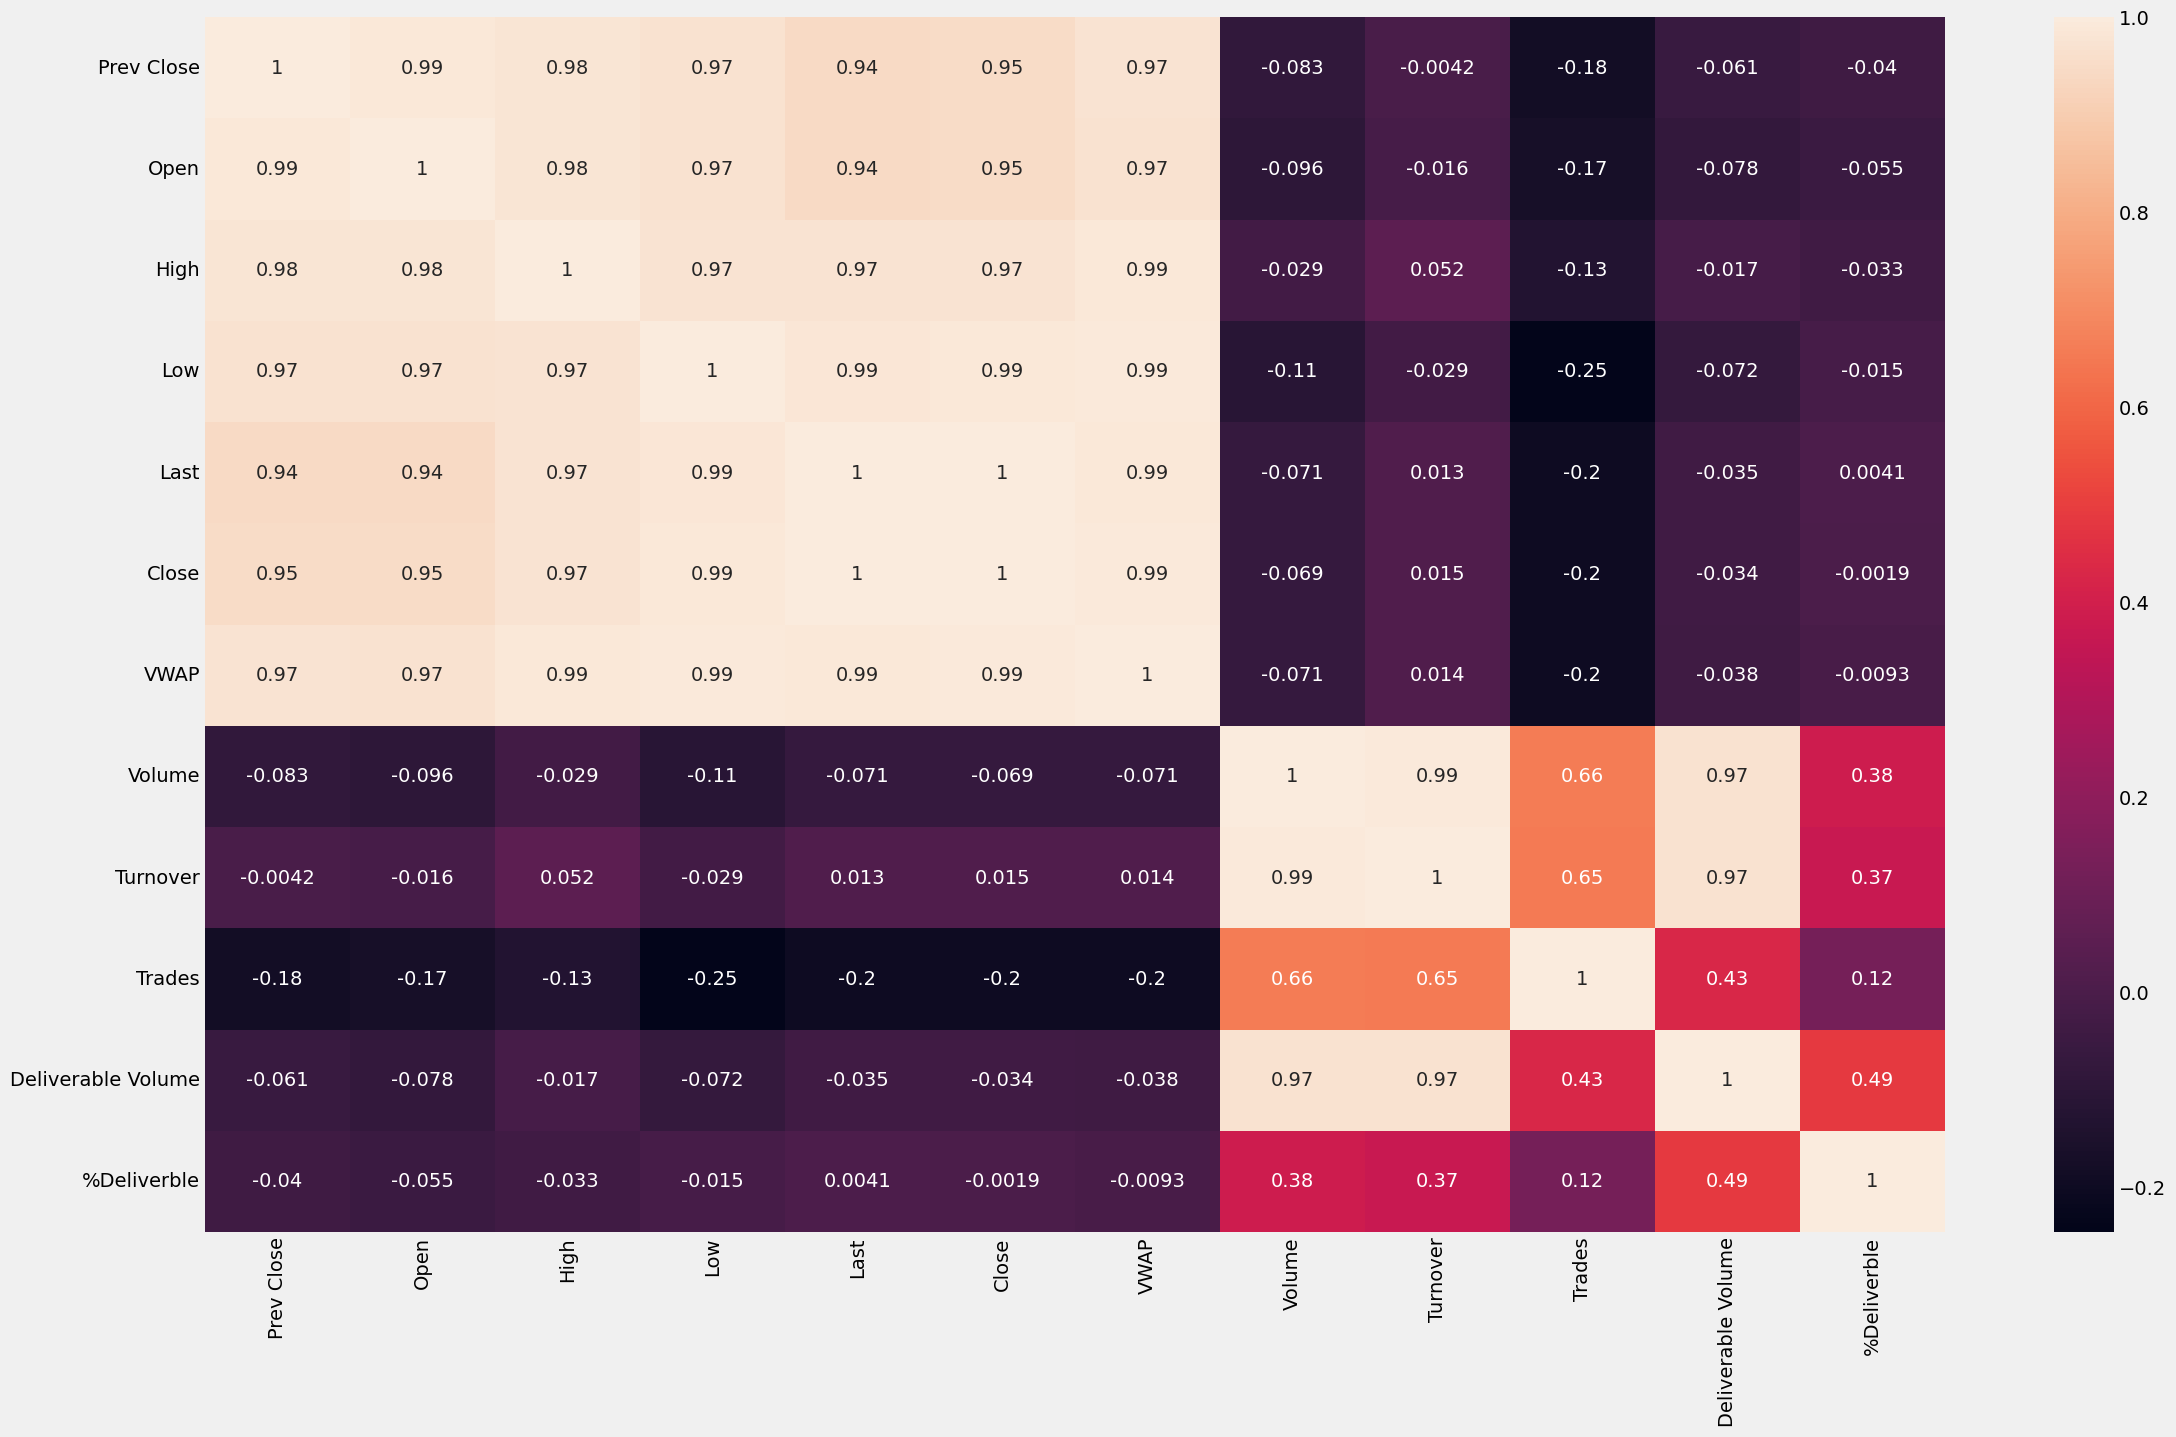

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(stockprice_one_year.corr(method='pearson'),annot=True)

4.4 How can you plot multiple in a single plot? For instance, use a red line for "Low", green line  for "High",and black line for "CLOSE"

<Axes: xlabel='Date'>

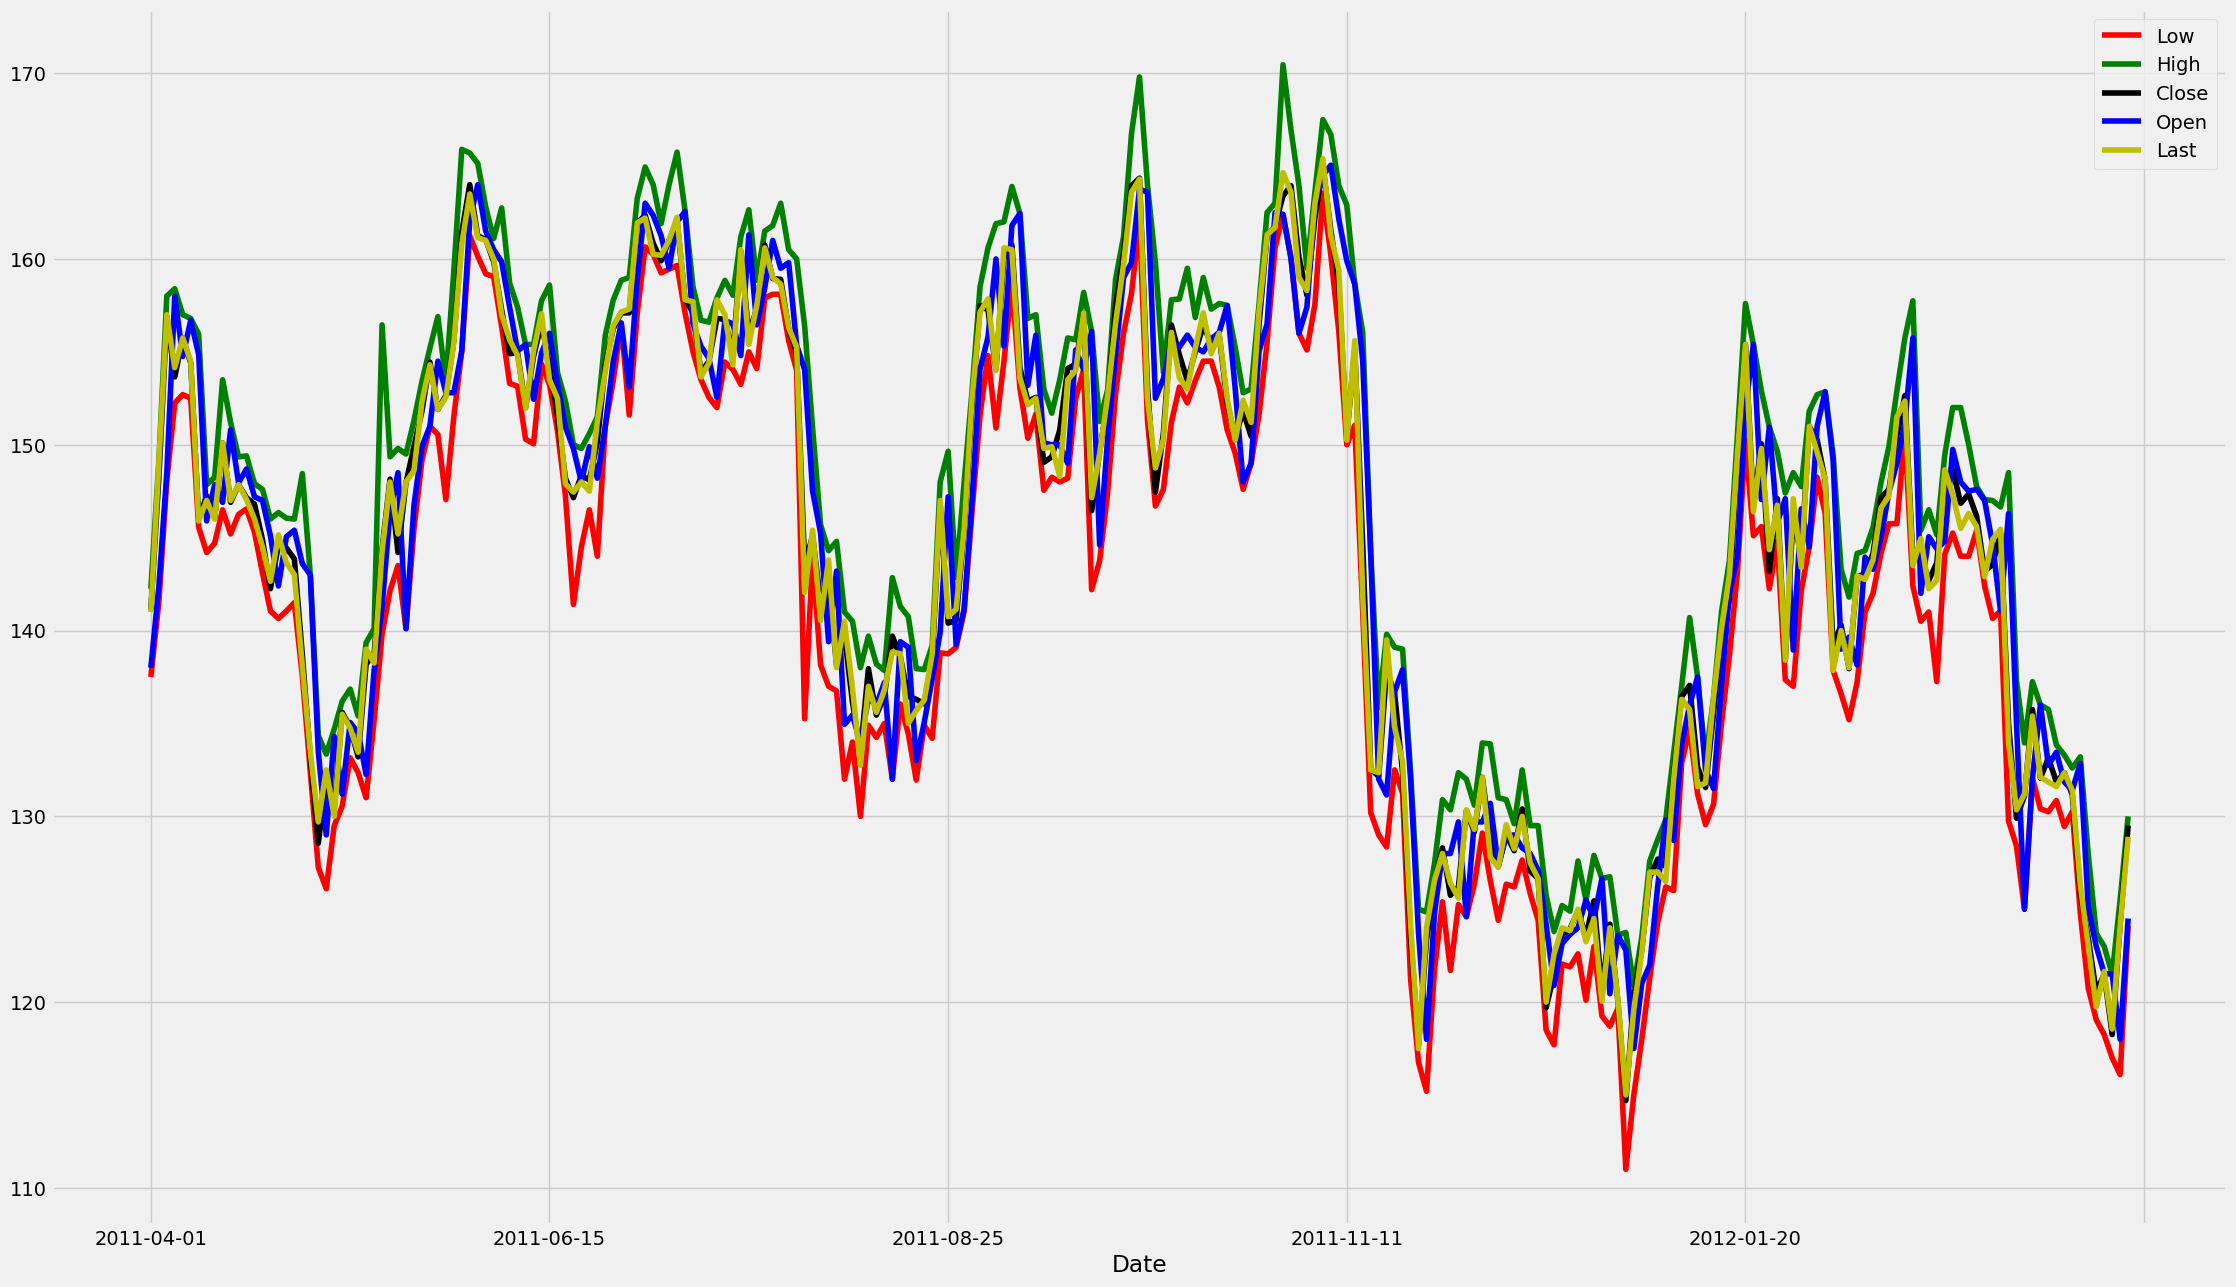

In [ ]:
stockprice_one_year.plot(x="Date", y=["Low", "High", "Close", "Open", "Last"], color=['r', 'g', 'k', 'b', 'y'], figsize=[25, 15])

4.5 Now, what does plt.fill_between() do? can you shade the region between low and high

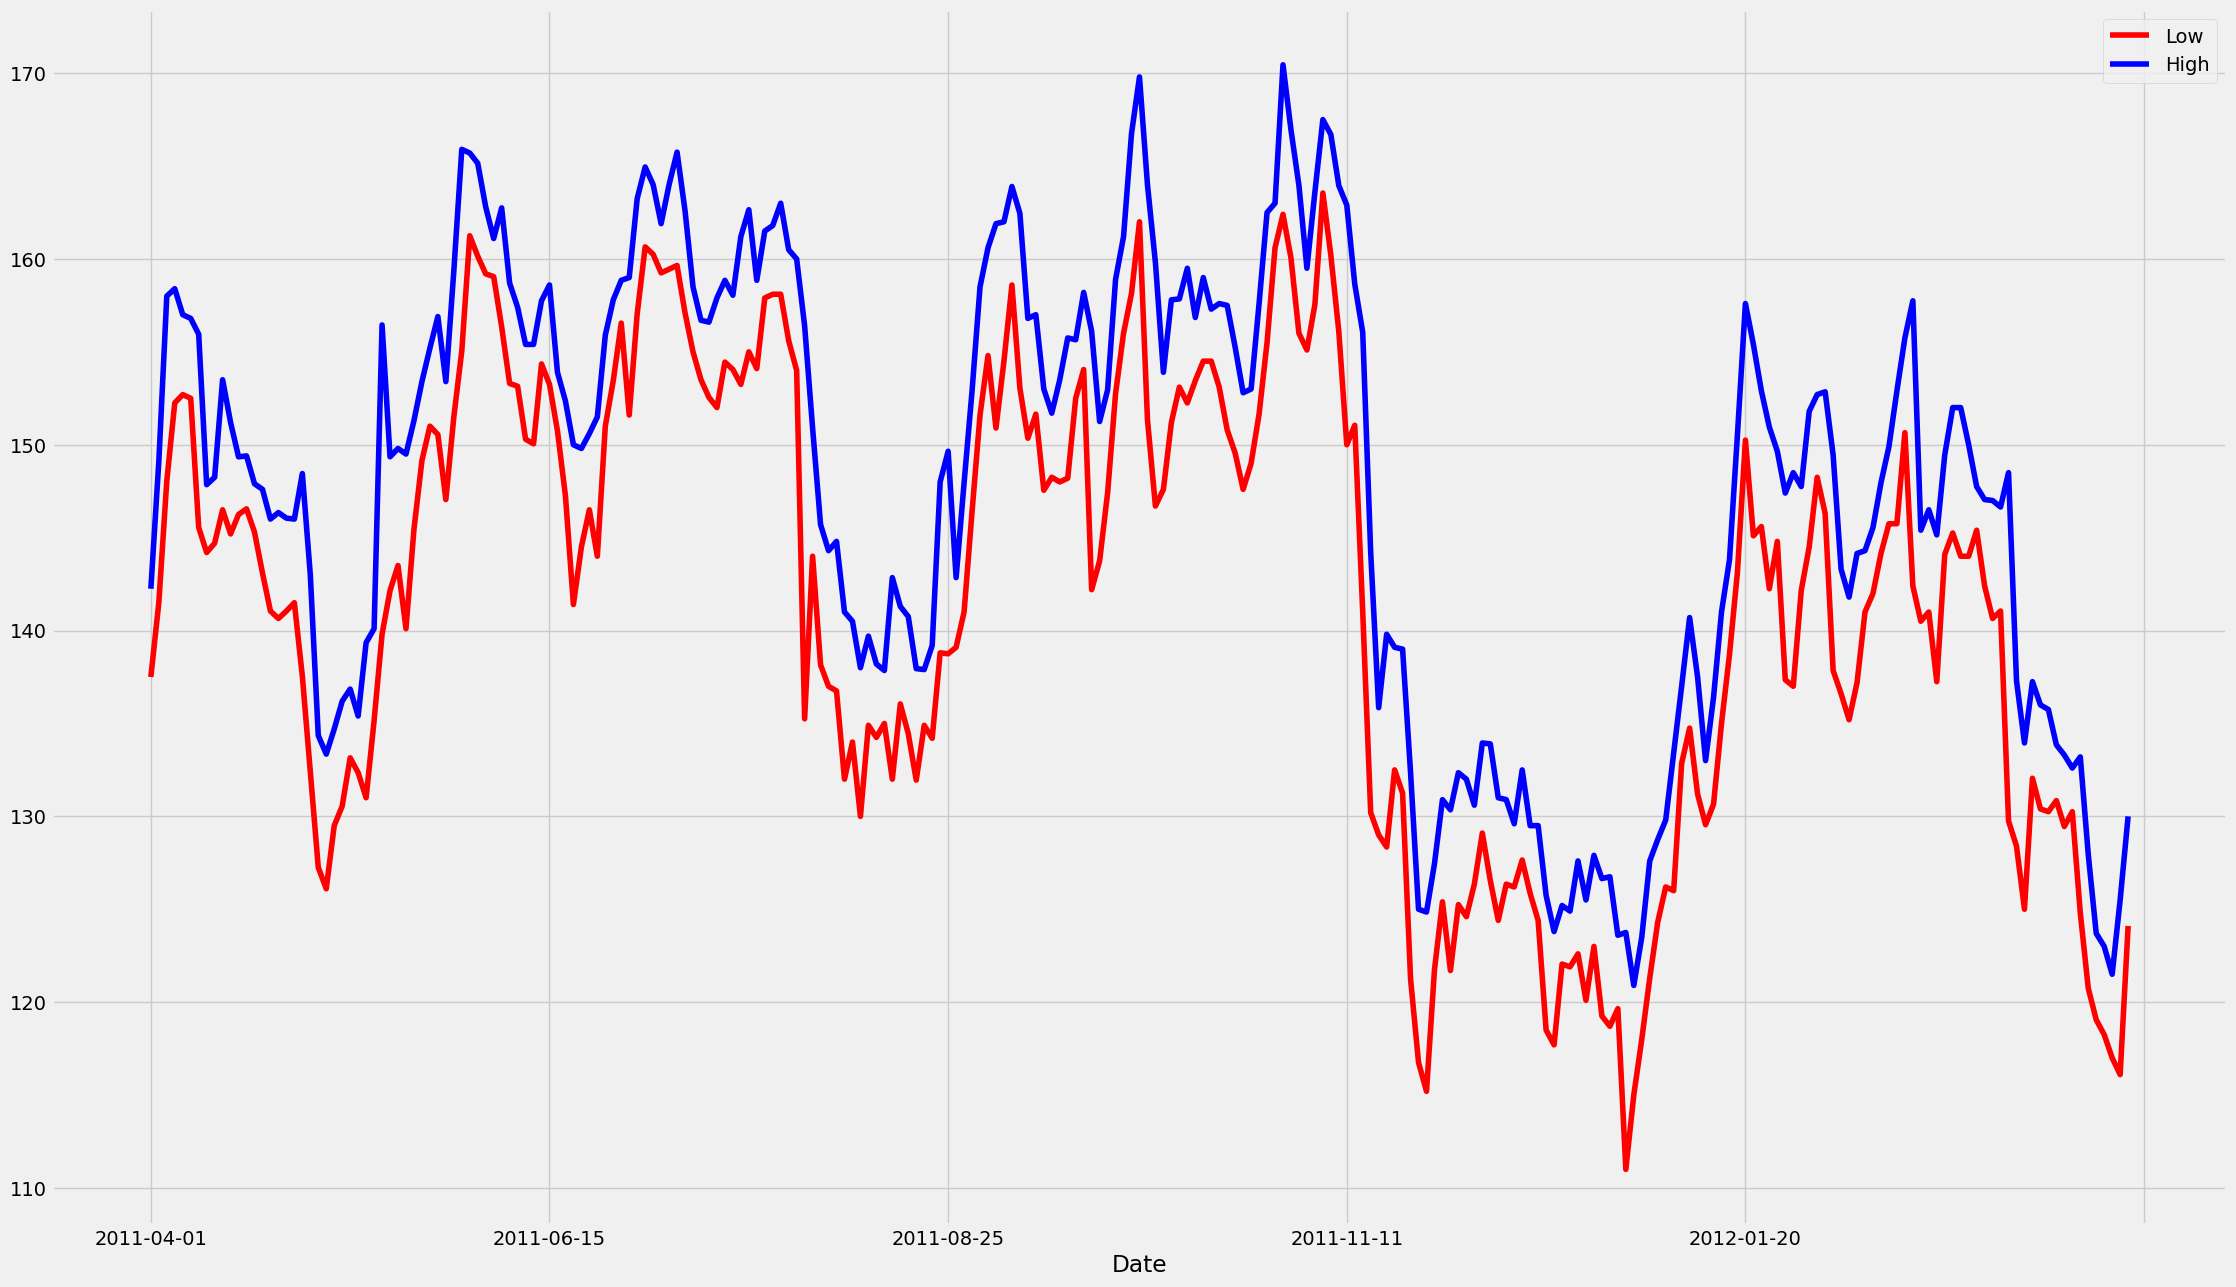

In [ ]:
stockprice_one_year.plot(x="Date", y=["Low", "High"], color=['r', 'b'], figsize=[25, 15])
plt.show()

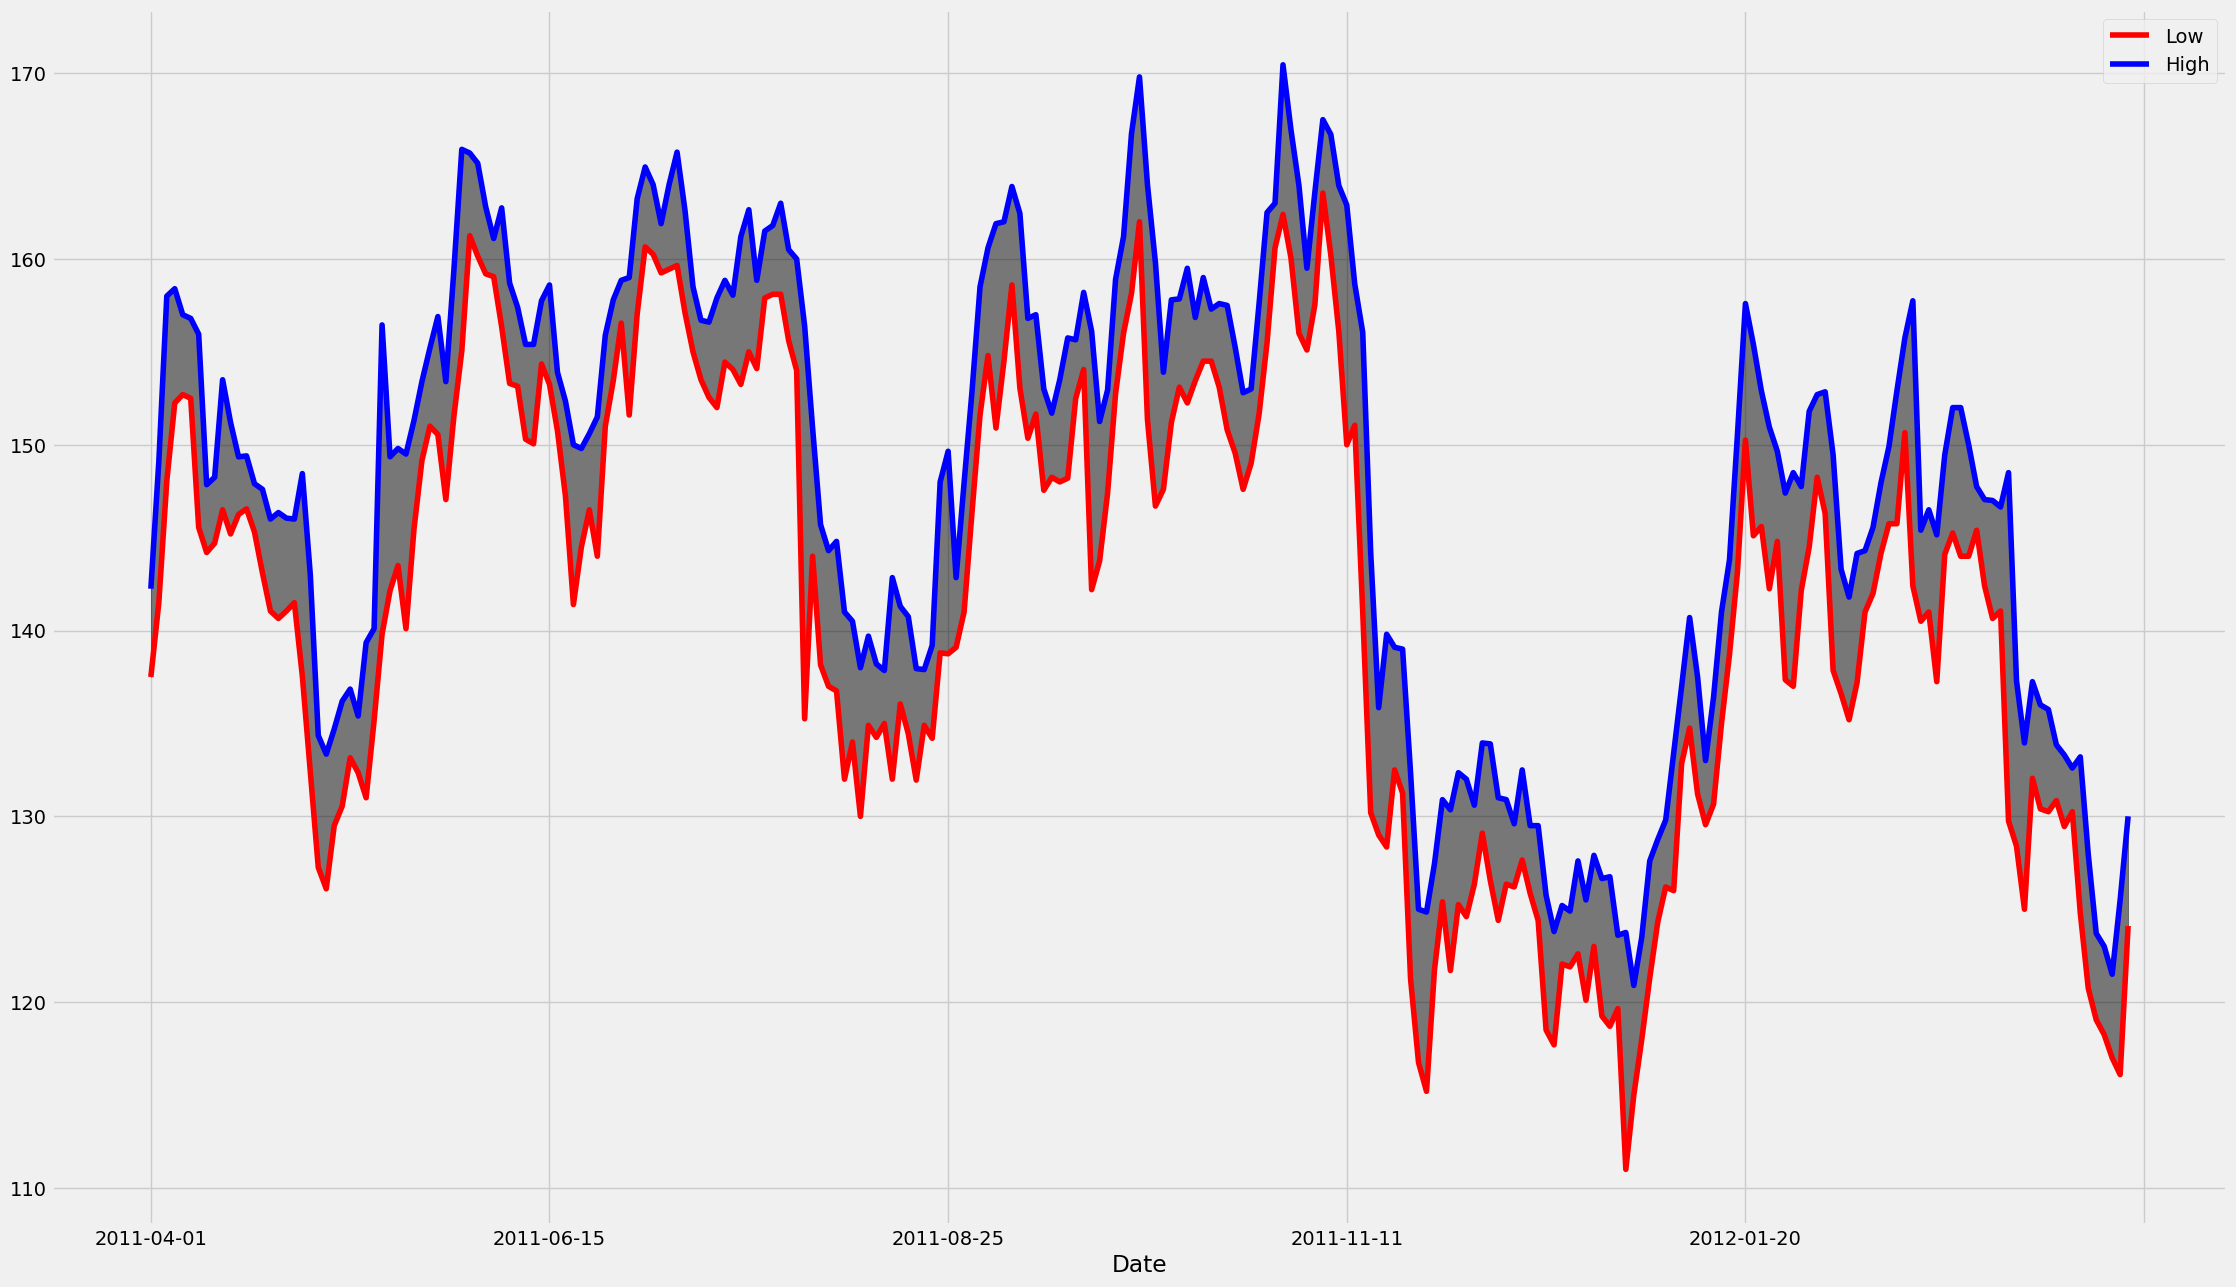

In [ ]:
stockprice_one_year.plot(x="Date", y=["Low","High"], color= ['r','b'], figsize= [25,15])
plt.fill_between(stockprice_one_year['Date'],stockprice_one_year['Low'], stockprice_one_year['High'],color= 'k', alpha=0.5)
plt.show()

4.6 DOes boxplot signify  simething for the sampled dataset?

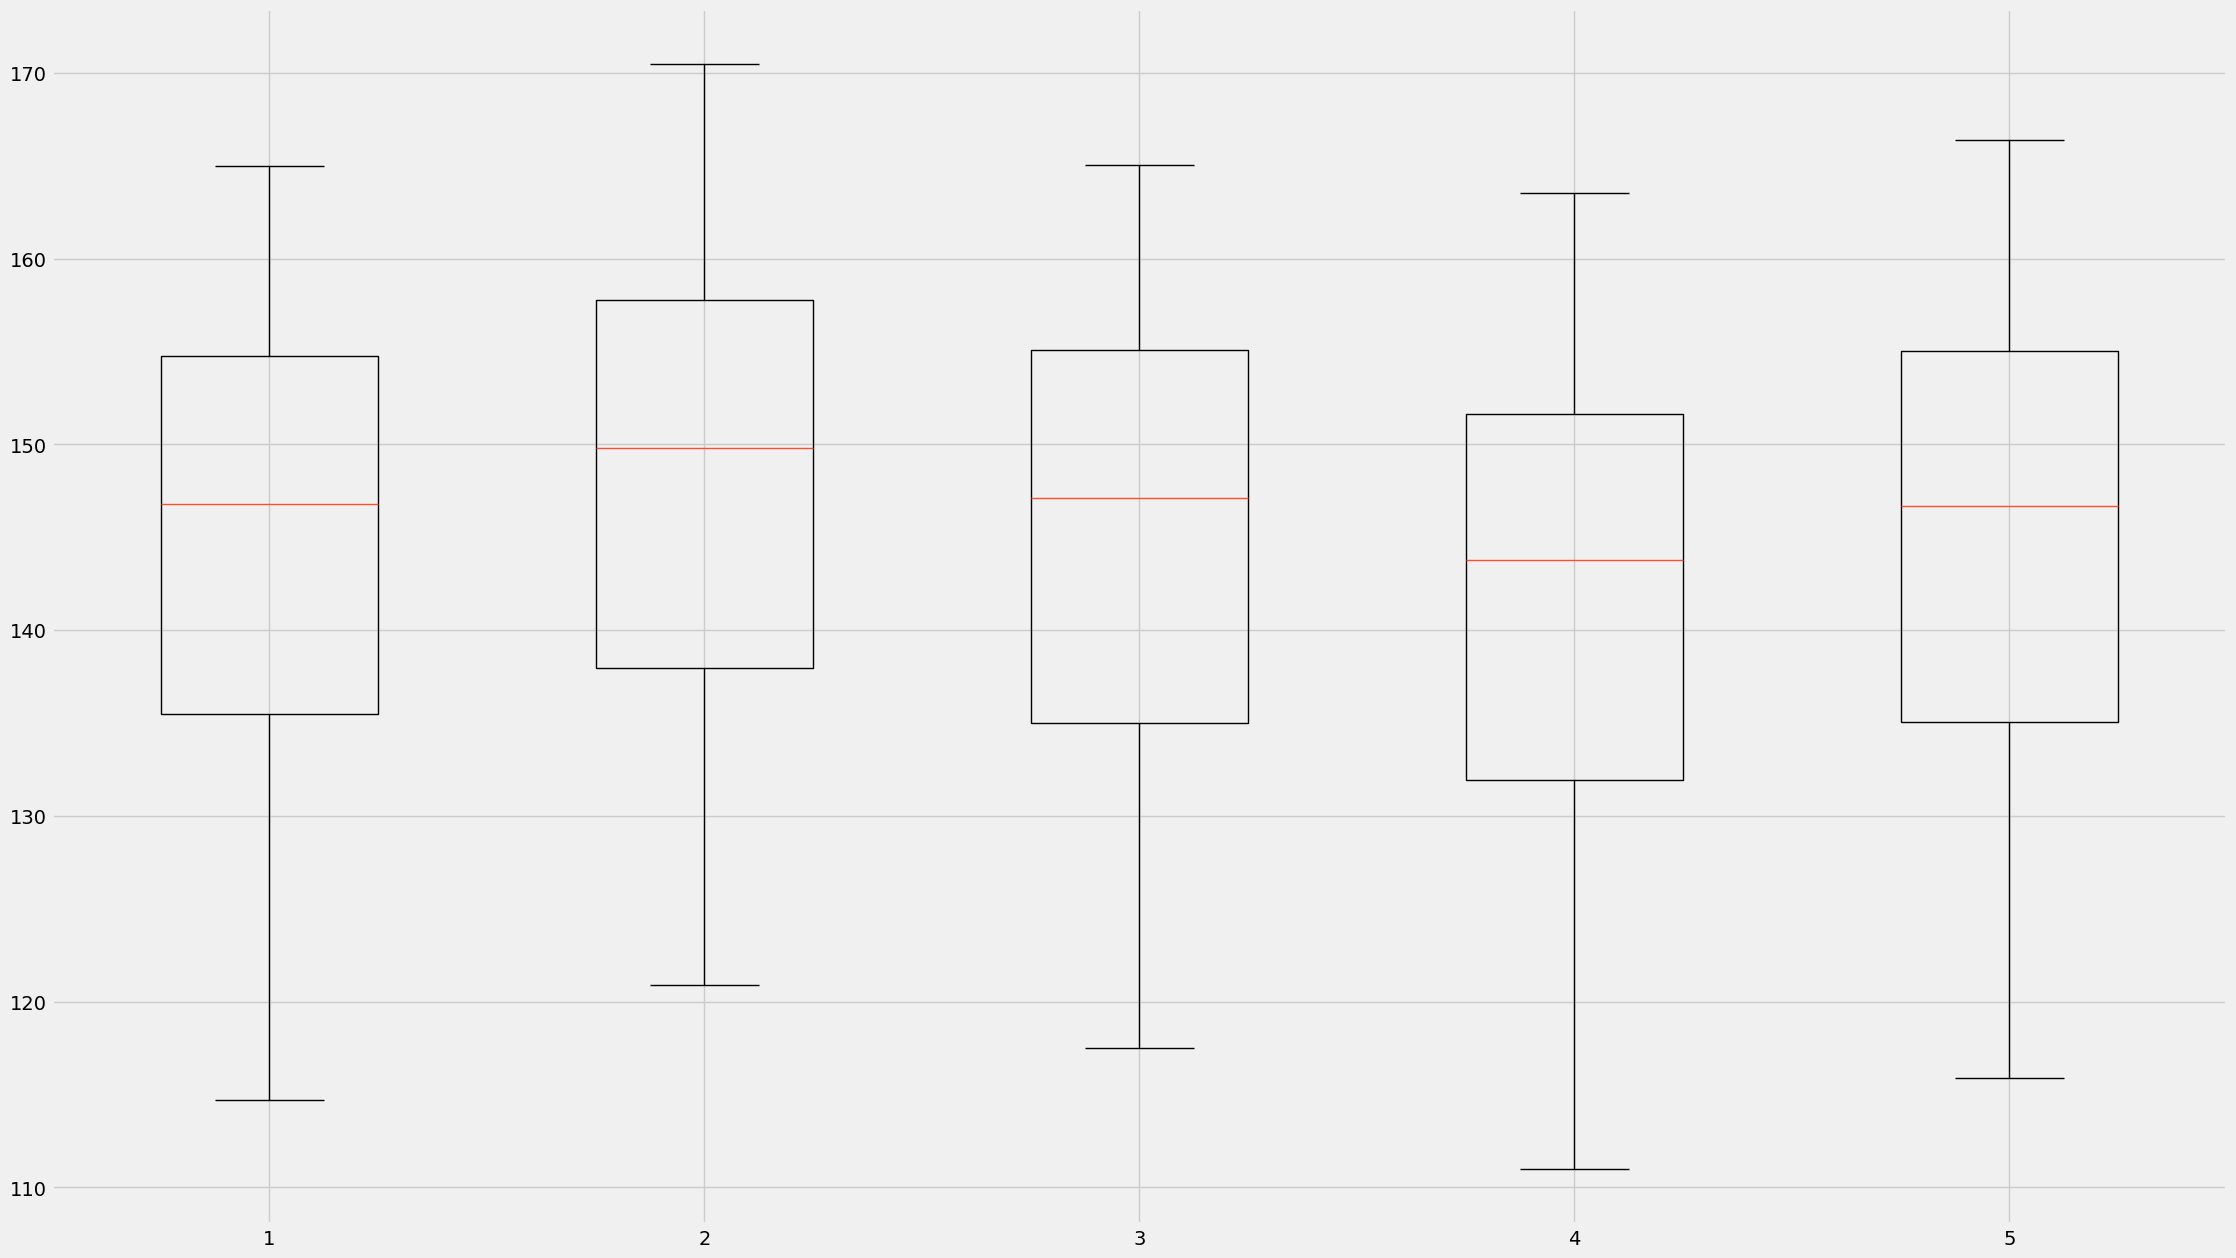

In [ ]:
plt.figure(figsize=(25,15))
plt.boxplot(stockprice_one_year[['Close','High','Open','Low','VWAP']])
plt.show()

5.Feature Engineering




In [ ]:
data = df[['Date','Open','High', 'Low', 'Volume','VWAP']]

In [ ]:
df.set_index("Date", drop = False  , inplace =True)

5.3. Visual Representation of Closing Price


<Axes: xlabel='Date'>

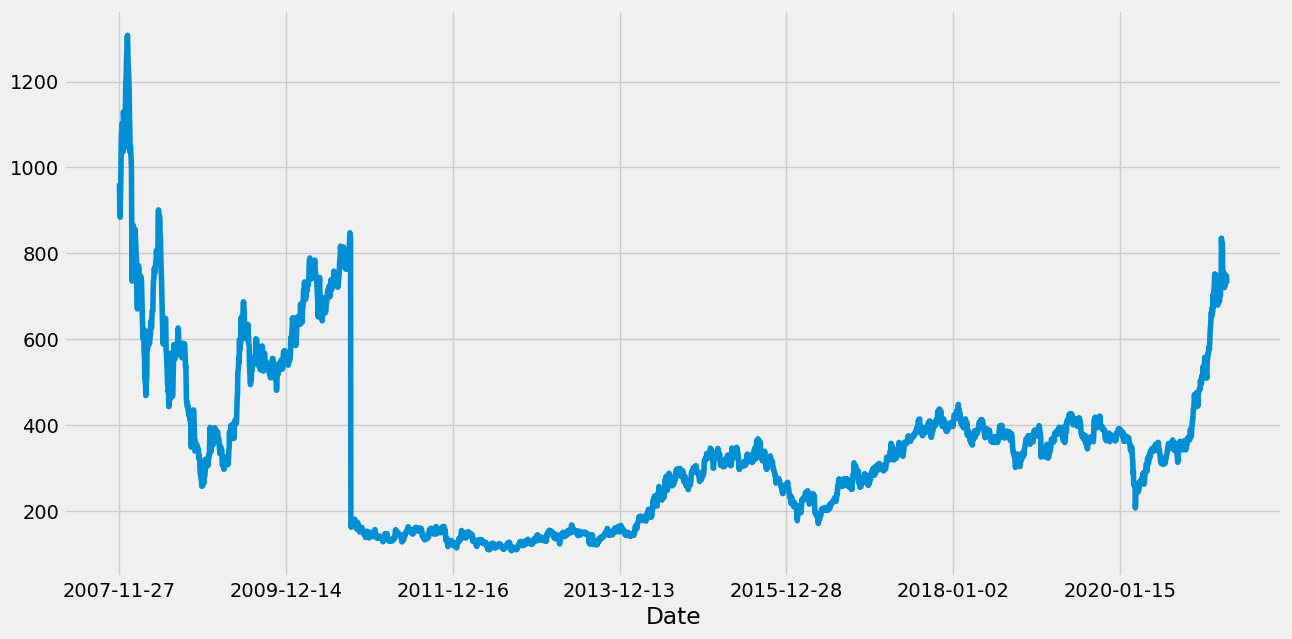

In [ ]:
df.Close.plot(figsize=(14,7))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Volume  3322 non-null   int64  
 5   VWAP    3322 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 155.8+ KB


5.4.  Generating new features -  Lag and Windows Features for features related to Closing Price

In [ ]:
df.reset_index(drop= True,  inplace= True)
lag_features = ["Open",'High','Low', 'VWAP']
window1= 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2,min_periods=0)
df_std_7d =df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
  df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
  df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')


5.5 Setting all Null/NaN value as a feature as mean of that feature

In [ ]:
df.fillna(df.mean(),  inplace = True)

5.6 Setting Date as index and viewing Dataset


In [ ]:
df.set_index("Date", drop = False, inplace = True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,9859619,0.3612,344.659943,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,1453278,0.3172,770.000000,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,1069678,0.2088,877.000000,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,1260913,0.2735,887.666687,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,816123,0.2741,927.666687,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066


Extracting Date Time Features from the dataset

In [ ]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"]  = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,10.534451,351.568359,9.889764,337.428894,10.137928,344.800964,9.702688,11,27,1
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,10.534451,1050.000000,9.889764,770.000000,10.137928,984.719971,9.702688,11,28,2
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,151.320847,1020.000000,42.426407,822.000000,73.539108,963.049988,30.646008,11,29,3
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,108.583298,984.916687,67.768143,828.333313,53.144459,938.063354,48.400303,11,30,4
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,88.665573,954.250000,56.945652,868.333313,53.231415,919.546692,39.768066,12,3,0


5.8.Removing unneccessary Features

In [ ]:
df = df.drop(columns= ['Symbol'])
df = df.drop(columns = ['Series'])

6.Model Building


6.1. Splitting Dataset into Training and Testing Data

In [ ]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [ ]:
df_valid.shape

(823, 24)

In [ ]:
!pip install keras
import  tensorflow
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train.head().T

Date,2007-11-27,2007-11-28,2007-11-29,2007-11-30,2007-12-03
Date,2007-11-27 00:00:00,2007-11-28 00:00:00,2007-11-29 00:00:00,2007-11-30 00:00:00,2007-12-03 00:00:00
Prev Close,440.0,962.9,893.9,884.2,921.55
Open,770.0,984.0,909.0,890.0,939.75
High,1050.0,990.0,914.75,958.0,995.0
Low,770.0,874.0,841.0,890.0,922.0
Last,959.0,885.0,887.0,929.0,980.0
Close,962.9,893.9,884.2,921.55,969.3
VWAP,984.72,941.38,888.09,929.17,965.65
Volume,27294366,4581338,5124121,4609762,2977470
Turnover,2687719053785000.0,431276530165000.0,455065846265000.0,428325662830000.0,287519974300000.0


6.2. Scaling Data and Transforming it for Training

In [ ]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_train = df_train["Close"].to_numpy().reshape(-1,1)

In [ ]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [ ]:
X_train = df_train.drop(columns= ["Close"])
X_train1 = X_train.drop("Date",axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date),1)

In [ ]:
X_valid = df_valid.drop(columns= ["Close"])
X_valid1 = X_valid.drop("Date",axis=1)
x_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date),1)


In [ ]:
X_train3= X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()

In [ ]:
y_train1= y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

6.3. Importing XGBoost  library

In [ ]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

7. Model Training

In [ ]:
xgb = XGBRegressor(n_estimator=10000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1), (X_valid3,y_valid1)], early_stopping_rounds=100, verbose= True)

[0]	validation_0-rmse:0.17557	validation_1-rmse:0.19037
[1]	validation_0-rmse:0.17385	validation_1-rmse:0.18671
[2]	validation_0-rmse:0.17214	validation_1-rmse:0.18324
[3]	validation_0-rmse:0.17046	validation_1-rmse:0.17996
[4]	validation_0-rmse:0.16878	validation_1-rmse:0.17687
[5]	validation_0-rmse:0.16713	validation_1-rmse:0.17398
[6]	validation_0-rmse:0.16549	validation_1-rmse:0.17144
[7]	validation_0-rmse:0.16387	validation_1-rmse:0.16894
[8]	validation_0-rmse:0.16226	validation_1-rmse:0.16665
[9]	validation_0-rmse:0.16067	validation_1-rmse:0.16468
[10]	validation_0-rmse:0.15909	validation_1-rmse:0.16279
[11]	validation_0-rmse:0.15753	validation_1-rmse:0.16112
[12]	validation_0-rmse:0.15599	validation_1-rmse:0.15973
[13]	validation_0-rmse:0.15446	validation_1-rmse:0.15853
[14]	validation_0-rmse:0.15295	validation_1-rmse:0.15746
[15]	validation_0-rmse:0.15145	validation_1-rmse:0.15660
[16]	validation_0-rmse:0.14996	validation_1-rmse:0.15594
[17]	validation_0-rmse:0.14850	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=10000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1200x800 with 0 Axes>

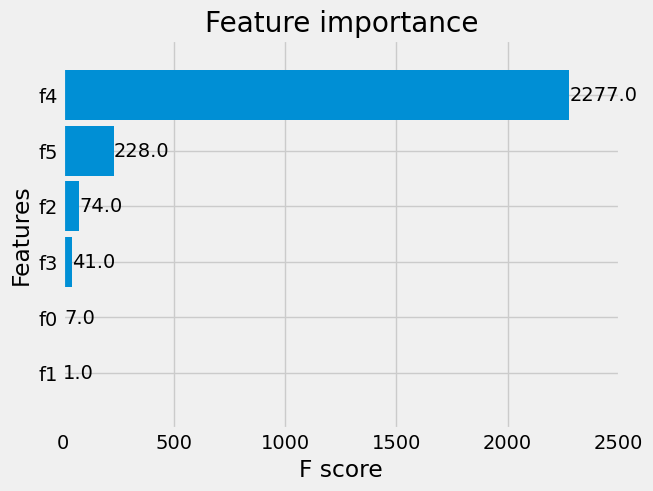

In [ ]:
plt.figure(figsize=(12,8))
feature_importance  = plot_importance(xgb, height =0.9)
feature_importance

7.2. Plotting results of the  Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t =xgb.predict(X_train3)
predicted_results_v = predicted_results_v.reshape(-1,1)
predicted_results_t = predicted_results_t.reshape(-1,1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

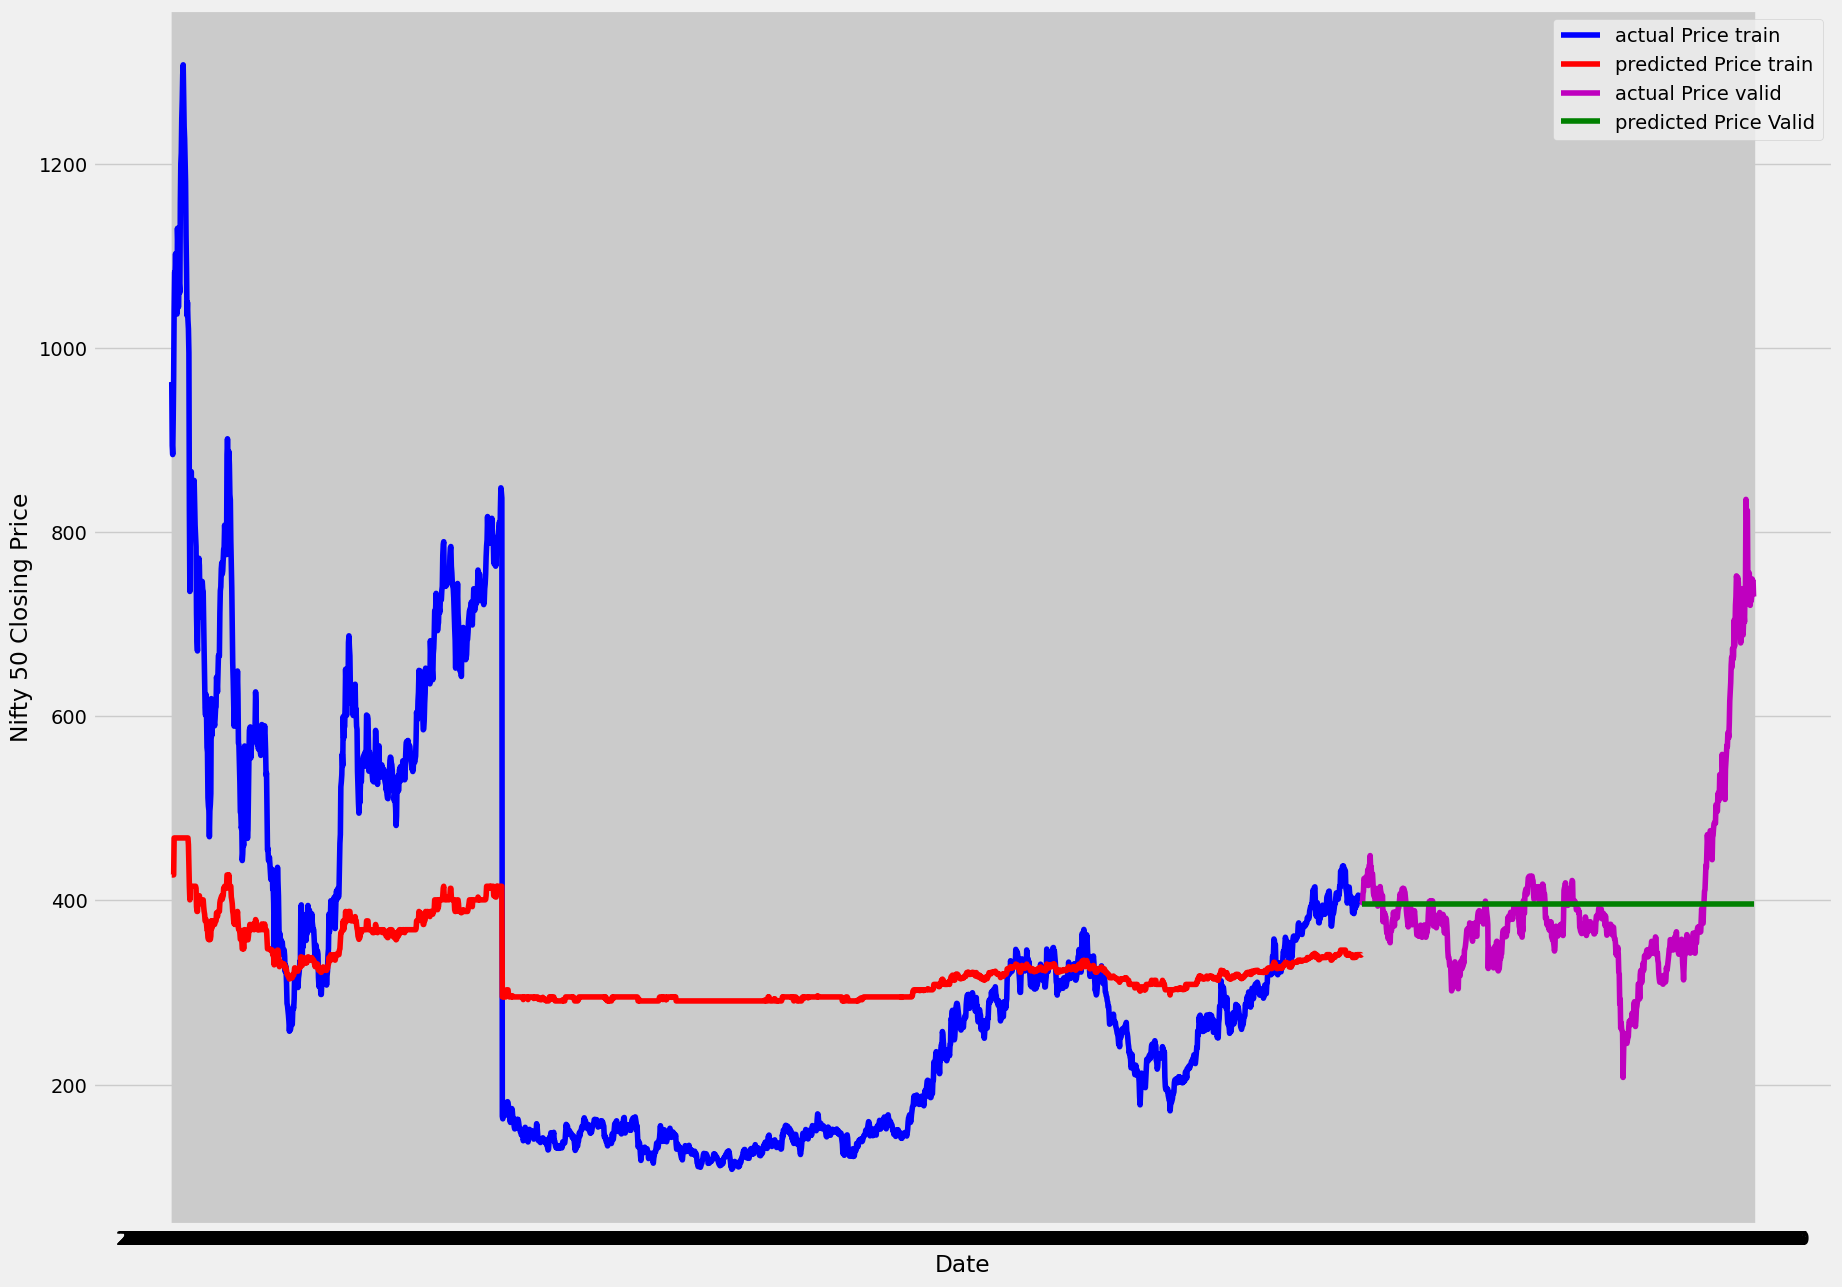

In [ ]:
plt.figure(figsize = (20,15))
plt.plot(X_train2.index, list(y_train),label="actual Price train", color='b')
plt.plot(X_train2.index, list(predicted_results_t), label = "predicted Price train",  color='r')
plt.plot(X_valid2.index, list(y_validn), label= "actual Price valid", color  ='m')
plt.plot(X_valid2.index,  list(predicted_results_v), label = "predicted Price Valid", color= 'g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

7.3. Training Model again

In [ ]:
xgb= XGBRegressor(n_estimator= 1000, learning_rate = 0.0099, max_depth=15)
xgb

xgb.fit(X_train3, y_train1,
        eval_set=[(X_train3,y_train1), (X_valid3, y_valid1)],
        early_stopping_rounds=100,
        verbose =True) # Change verbose to True if you want to seeit train again

[0]	validation_0-rmse:0.17559	validation_1-rmse:0.19041
[1]	validation_0-rmse:0.17389	validation_1-rmse:0.18679
[2]	validation_0-rmse:0.17220	validation_1-rmse:0.18334
[3]	validation_0-rmse:0.17052	validation_1-rmse:0.18009
[4]	validation_0-rmse:0.16887	validation_1-rmse:0.17702
[5]	validation_0-rmse:0.16723	validation_1-rmse:0.17415
[6]	validation_0-rmse:0.16560	validation_1-rmse:0.17162
[7]	validation_0-rmse:0.16400	validation_1-rmse:0.16913
[8]	validation_0-rmse:0.16240	validation_1-rmse:0.16684
[9]	validation_0-rmse:0.16083	validation_1-rmse:0.16488
[10]	validation_0-rmse:0.15927	validation_1-rmse:0.16299
[11]	validation_0-rmse:0.15772	validation_1-rmse:0.16130
[12]	validation_0-rmse:0.15619	validation_1-rmse:0.15991
[13]	validation_0-rmse:0.15468	validation_1-rmse:0.15869
[14]	validation_0-rmse:0.15318	validation_1-rmse:0.15760
[15]	validation_0-rmse:0.15169	validation_1-rmse:0.15672
[16]	validation_0-rmse:0.15022	validation_1-rmse:0.15603
[17]	validation_0-rmse:0.14876	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0099, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=1000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

7.4. Plotting Results of the Model

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t =xgb.predict(X_train3)
predicted_results_v = predicted_results_v.reshape(-1,1)
predicted_results_t = predicted_results_t.reshape(-1,1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

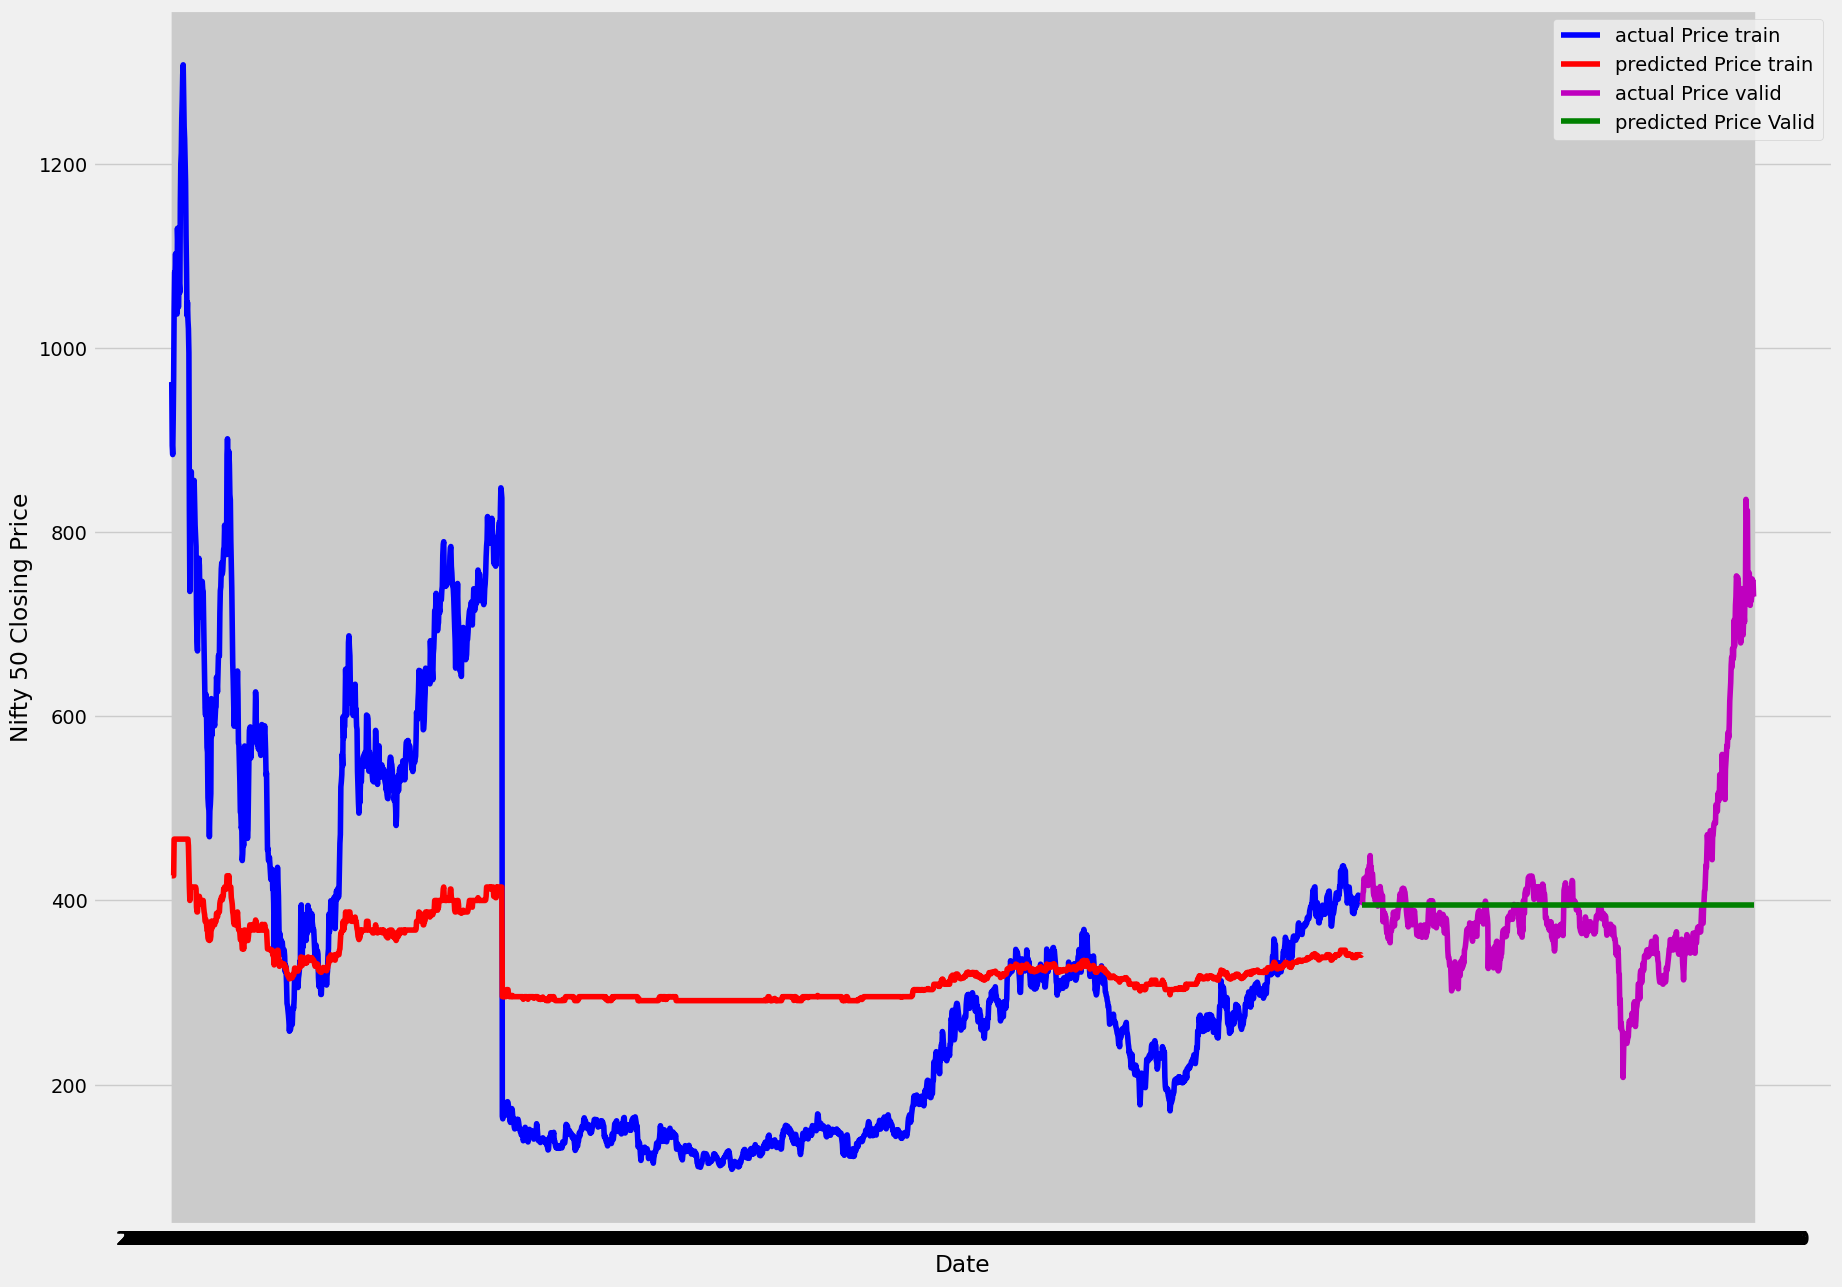

In [ ]:
plt.figure(figsize = (20,15))
plt.plot(X_train2.index, list(y_train),label="actual Price train", color='b')
plt.plot(X_train2.index, list(predicted_results_t), label = "predicted Price train",  color='r')
plt.plot(X_valid2.index, list(y_validn), label= "actual Price valid", color  ='m')
plt.plot(X_valid2.index,  list(predicted_results_v), label = "predicted Price Valid", color= 'g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

8. Conclusion:

Hence, we were able to accurately predict the stocks and we also learned to make machine learning model on stocks prediction